# Analyzing Time Series Data

## This script contains:
### 1. Importing libraries and data
### 2. Subsetting, wrangling, and cleaning time-series data
### 3. Time series analysis: decompostition
### 4. Testing for stationarity
### 5. Stationarizing data

### 01. Importing libraries and data

In [1]:
# import libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# define path

path = '/Users/mariasampogna/Documents/Career Foundry/Data Analytics Immersion/Achievement 6/EPA Air Quality Analysis'

In [3]:
# import air quality data

data = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','EPA Daily Data with AQI Categories.pkl'))

In [4]:
data.head()

,Unnamed: 0,Site Num,Latitude,Longitude,Sample Duration Ozone,Pollutant Standard Ozone,Date Local,Units of Measure Ozone,Event Type Ozone,Observation Count Ozone,...,Observation Count SO2,Observation Percent SO2,Arithmetic Mean SO2,1st Max Value SO2,1st Max Hour SO2,AQI SO2,Method Code SO2,Method Name SO2,_merge,AQI Level Ozone
0,0,10.0,30.497478,-87.880258,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2022-02-28,Parts per million,None,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Good
1,1,10.0,30.497478,-87.880258,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2022-03-01,Parts per million,None,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Good
2,2,10.0,30.497478,-87.880258,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2022-03-02,Parts per million,None,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Moderate
3,3,10.0,30.497478,-87.880258,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2022-03-03,Parts per million,None,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Good
4,4,10.0,30.497478,-87.880258,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2022-03-04,Parts per million,None,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Moderate


In [5]:
data.shape

(472410, 61)

In [6]:
data.columns

Index(['Unnamed: 0', 'Site Num', 'Latitude', 'Longitude',
       'Sample Duration Ozone', 'Pollutant Standard Ozone', 'Date Local',
       'Units of Measure Ozone', 'Event Type Ozone', 'Observation Count Ozone',
       'Observation Percent Ozone', 'Arithmetic Mean Ozone',
       '1st Max Value Ozone', '1st Max Hour Ozone', 'AQI Ozone',
       'Method Code Ozone', 'Method Name Ozone', 'Local Site Name', 'Address',
       'State Name', 'County Name', 'City Name', 'CBSA Name',
       'Sample Duration CO', 'Pollutant Standard CO', 'Units of Measure CO',
       'Event Type CO', 'Observation Count CO', 'Observation Percent CO',
       'Arithmetic Mean CO', '1st Max Value CO', '1st Max Hour CO', 'AQI CO',
       'Method Code CO', 'Method Name CO', 'Sample Duration NO2',
       'Pollutant Standard NO2', 'Units of Measure NO2', 'Event Type NO2',
       'Observation Count NO2', 'Observation Percent NO2',
       'Arithmetic Mean NO2', '1st Max Value NO2', '1st Max Hour NO2',
       'AQI NO2', 'Me

### 2. Subsetting, wrangling, and cleaning time-series data

In [7]:
data_2 = data.loc[(data['State Name']=='Arizona')]

In [8]:
data_2.shape

(12304, 61)

In [9]:
# create a list of columns needed for time series subset

columns = ['Date Local','AQI Ozone']

In [10]:
# create a subset using only the columns needed

data_sub = data_2[columns]

In [11]:
data_sub.head()

,Date Local,AQI Ozone
4667,2022-01-01,40.0
4668,2022-01-02,38.0
4669,2022-01-03,34.0
4670,2022-01-04,42.0
4671,2022-01-05,41.0


In [12]:
data_sub = data_sub.groupby(
    [data_sub['Date Local']])["AQI Ozone"].mean().reset_index(name='Average Ozone AQI')

In [13]:
data_sub.head()


,Date Local,Average Ozone AQI
0,2022-01-01,41.072727
1,2022-01-02,37.836364
2,2022-01-03,32.767857
3,2022-01-04,31.071429
4,2022-01-05,29.196429


In [14]:
data_sub.shape

(304, 2)

#### Disucssion

For this subset, I chose to use only the AQI data from Arizona. In the geographical analysis, this was the state with the highest average AQI value, so narrowing down the data in this way allows us to focus analysis on one particual geogrpahic area that merits additional analysis. In addition to filtering the data by state name, I also calculated the average of all readings for each day, so there is only one data point per day in the data.

In [15]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date Local'])
data_sub = data_sub.set_index('datetime')
data_sub.drop(['Date Local'], axis=1, inplace=True)
data_sub.head()

,Average Ozone AQI
datetime,
2022-01-01,41.072727
2022-01-02,37.836364
2022-01-03,32.767857
2022-01-04,31.071429
2022-01-05,29.196429


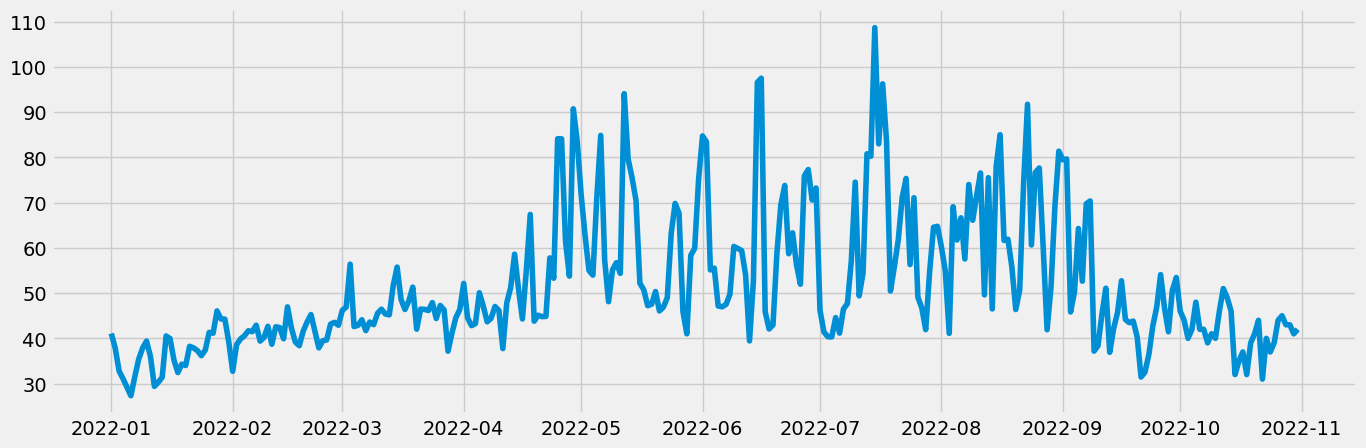

In [16]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [17]:
# check for missing values

data_sub.isnull().sum() 

Average Ozone AQI    0
dtype: int64

### 3. Time-series analysis: decomposition

In [18]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

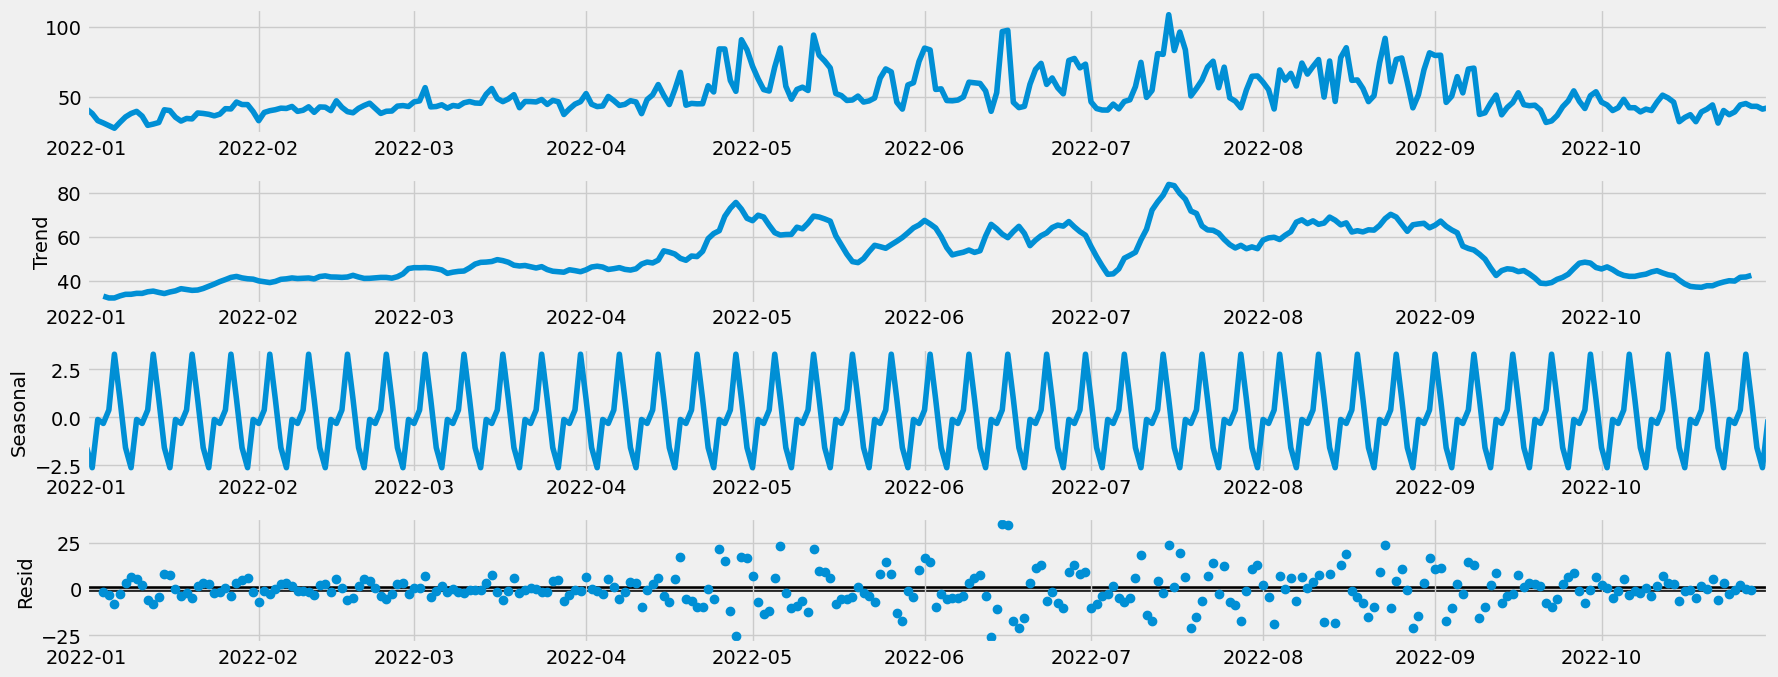

In [20]:
# Plot the separate components

decomposition.plot()
plt.show()

#### Smoothing data using moving average

In [21]:
# calculating simple moving average
# using .rolling(window).mean() ,
# with window size = 30
data_sub['SMA30'] = data_sub['Average Ozone AQI'].rolling(30).mean()
 
# removing all the NULL values using
# dropna() method
data_sub.dropna(inplace=True)
 
# printing Dataframe
data_sub

,Average Ozone AQI,SMA30
datetime,,
2022-01-30,44.250000,36.366184
2022-01-31,39.228070,36.304696
2022-02-01,32.714286,36.133960
2022-02-02,38.607143,36.328603
2022-02-03,39.857143,36.621460
...,...,...
2022-10-27,45.000000,41.918182
2022-10-28,43.000000,41.969697
2022-10-29,43.000000,41.715152


<Axes: xlabel='datetime'>

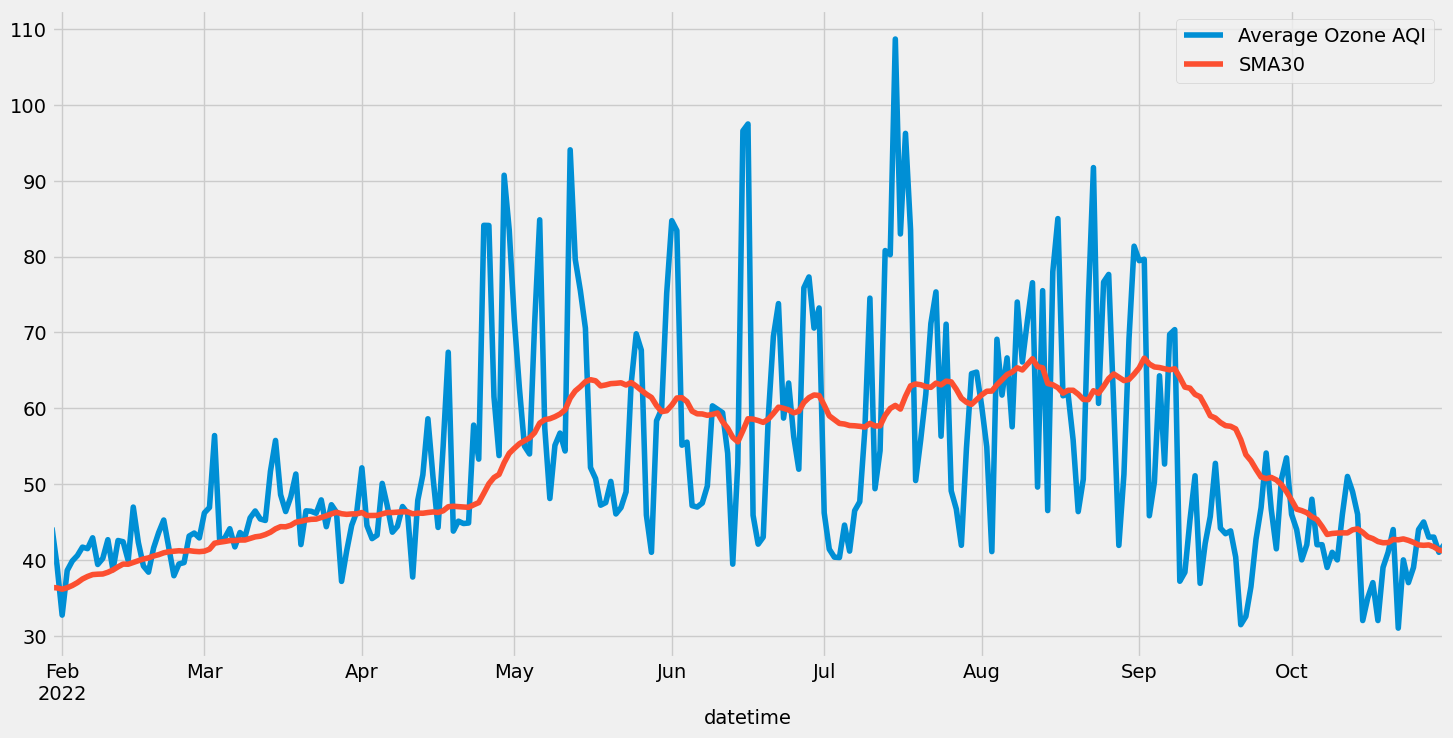

In [22]:
# plotting Close price and simple
# moving average of 30 days using .plot() method
data_sub[['Average Ozone AQI', 'SMA30']].plot(label='data_sub',
                                  figsize=(16, 8))

In [23]:
# create new dataframe with only the moving average

data_smooth = data_sub.drop('Average Ozone AQI', axis=1)

In [24]:
data_smooth.head()

,SMA30
datetime,
2022-01-30,36.366184
2022-01-31,36.304696
2022-02-01,36.133960
2022-02-02,36.328603
2022-02-03,36.621460


In [25]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_smooth, model='additive')

In [26]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

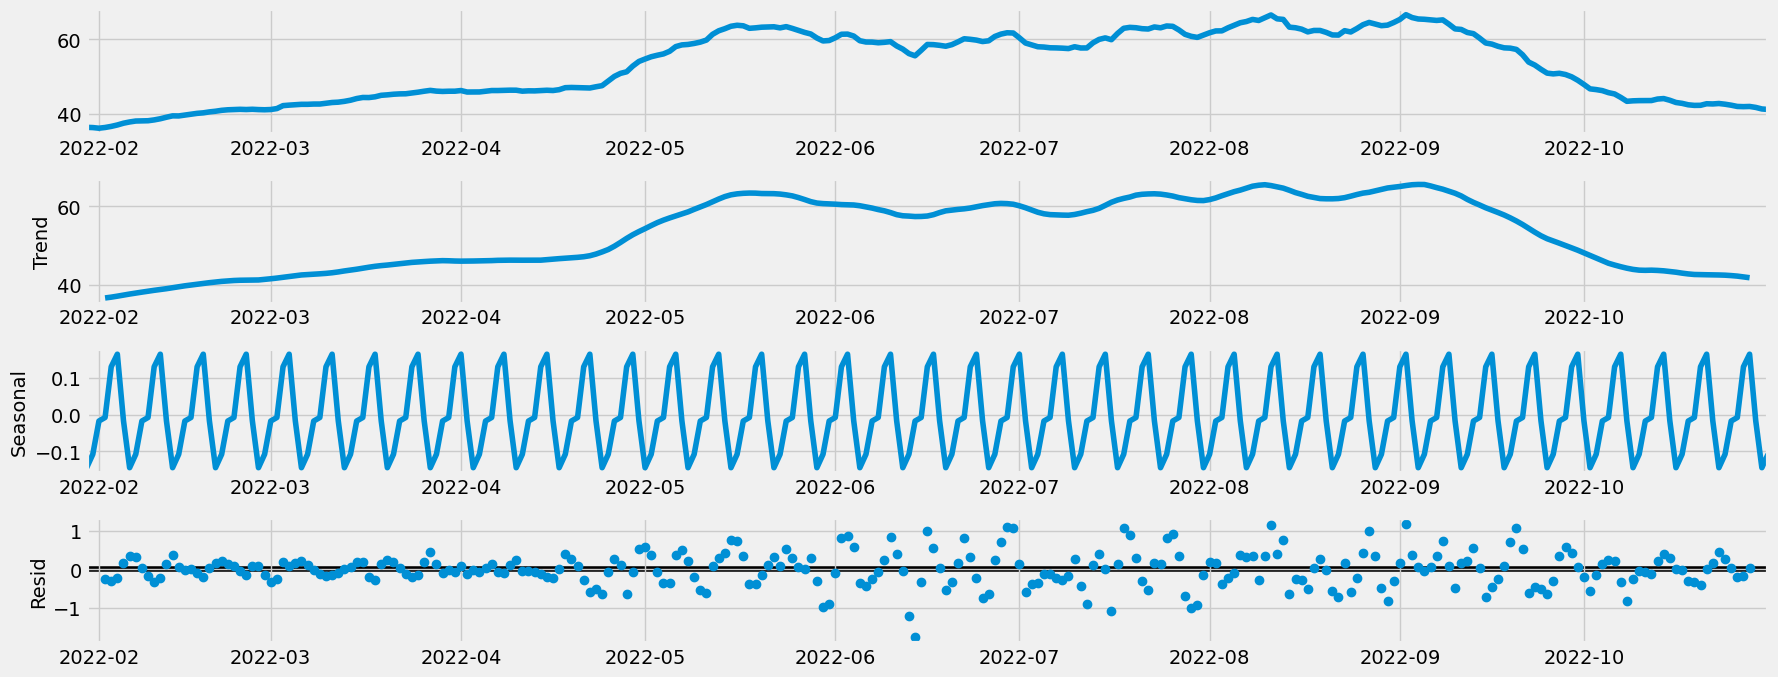

In [27]:
# Plot the separate components

decomposition.plot()
plt.show()

#### Discussion

After smoothing the data, we can see that the trend line is very similar to the level, increasing through May, rempaing fairly consistent, and then decreasing through the end of the year. The seasonility section confirms that there is seasonality within the data, as well. We can also see that there is a fair amount of noise in the data, even after smoothing. THis is especially true during the months with higher average AQI values (May through July).

### 4. Testing for stationarity

In [28]:
 # Import the adfuller() function

from statsmodels.tsa.stattools import adfuller

# Define the function

def dickey_fuller(timeseries):
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_smooth['SMA30'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.666851
p-value                          0.448268
Number of Lags Used              7.000000
Number of Observations Used    267.000000
Critical Value (1%)             -3.455081
Critical Value (5%)             -2.872427
Critical Value (10%)            -2.572571
dtype: float64


#### Discussion

The results of the Dickey-Fuller test show that the test statistic is larger than the ciritical value at both the 5 and 10% confidence level, which means we cannot reject our null hypothesis that there is a unit root present in the data. The data will need to be stationarized and re-tested.

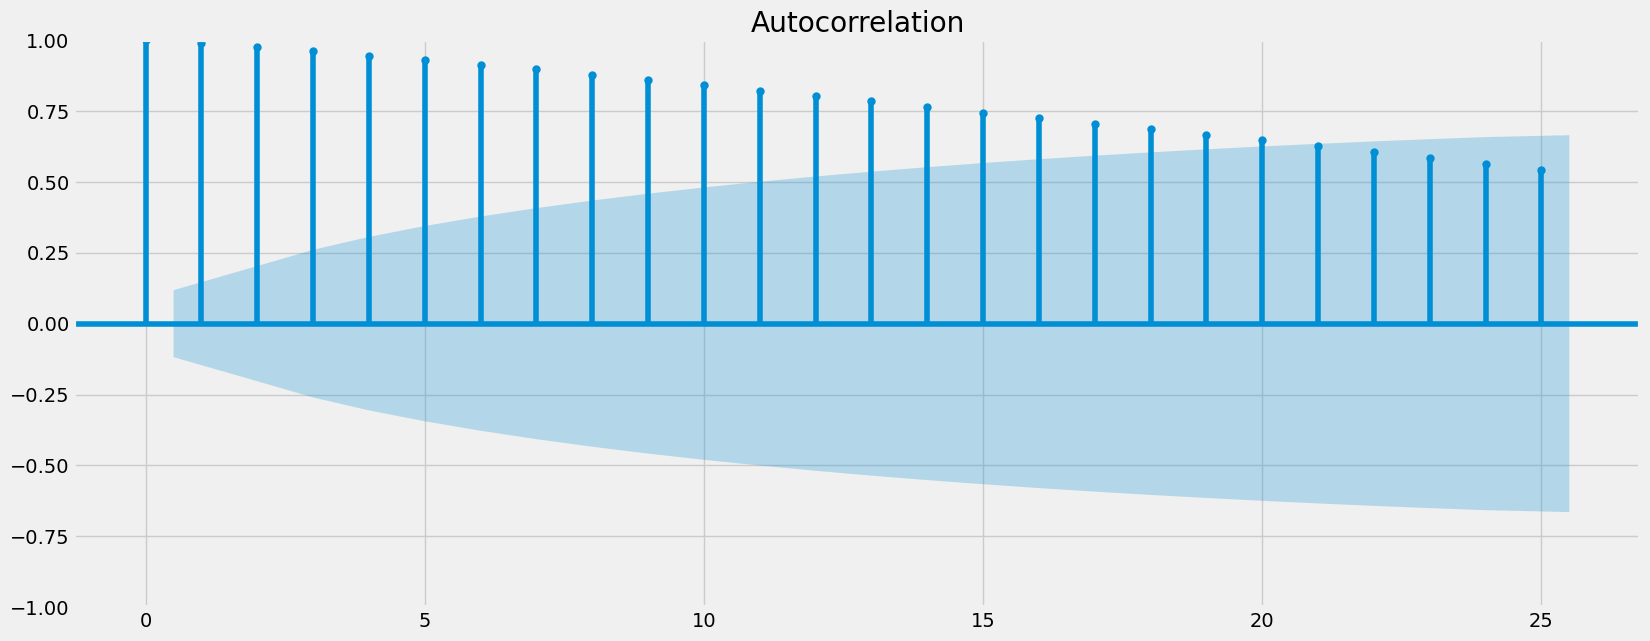

In [29]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_smooth)
plt.show()

### 5. Stationarizing the data

In [30]:
data_diff = data_smooth - data_smooth.shift(1)

In [31]:
data_diff.dropna(inplace = True)

In [32]:
data_diff.head()

,SMA30
datetime,
2022-01-31,-0.061489
2022-02-01,-0.170736
2022-02-02,0.194643
2022-02-03,0.292857
2022-02-04,0.379167


In [33]:
data_diff.columns

Index(['SMA30'], dtype='object')

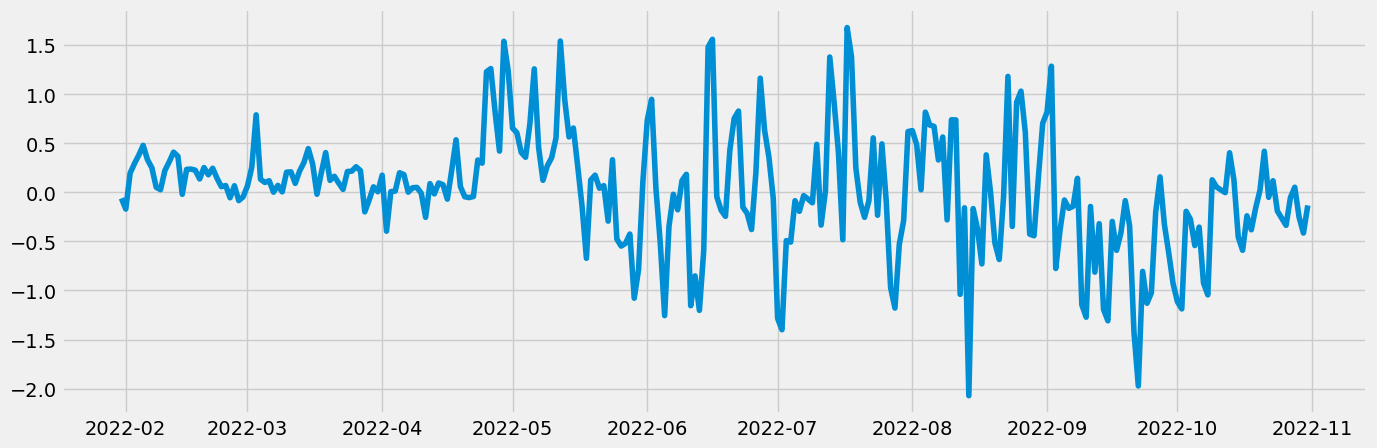

In [34]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [35]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -3.440704
p-value                          0.009647
Number of Lags Used              6.000000
Number of Observations Used    267.000000
Critical Value (1%)             -3.455081
Critical Value (5%)             -2.872427
Critical Value (10%)            -2.572571
dtype: float64


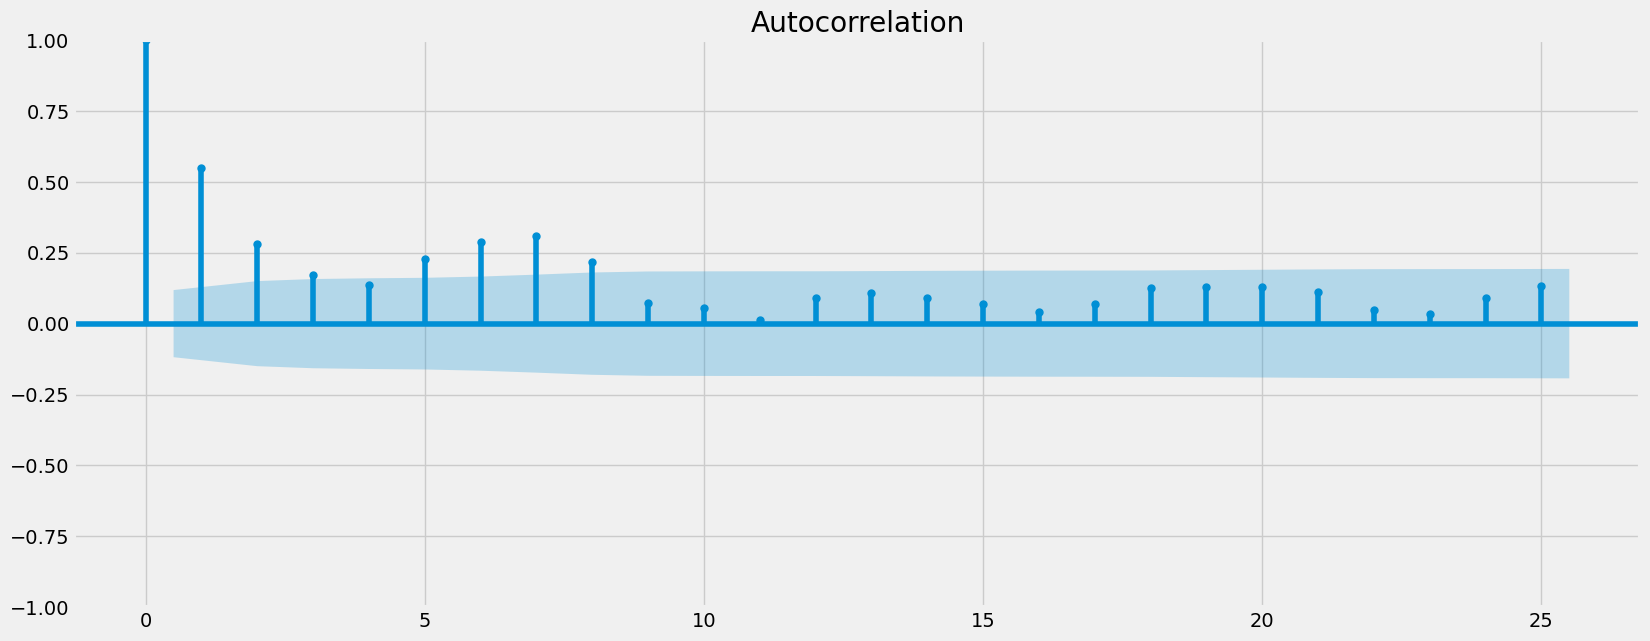

In [36]:
plot_acf(data_diff)
plt.show()

In [37]:
# conduct a second round of differencing

data_diff_2 = data_diff - data_diff.shift(1)

In [38]:
data_diff_2.dropna(inplace = True)

In [39]:
data_diff_2.head()

,SMA30
datetime,
2022-02-01,-0.109247
2022-02-02,0.365379
2022-02-03,0.098214
2022-02-04,0.086310
2022-02-05,0.099405


In [40]:
data_diff_2.columns

Index(['SMA30'], dtype='object')

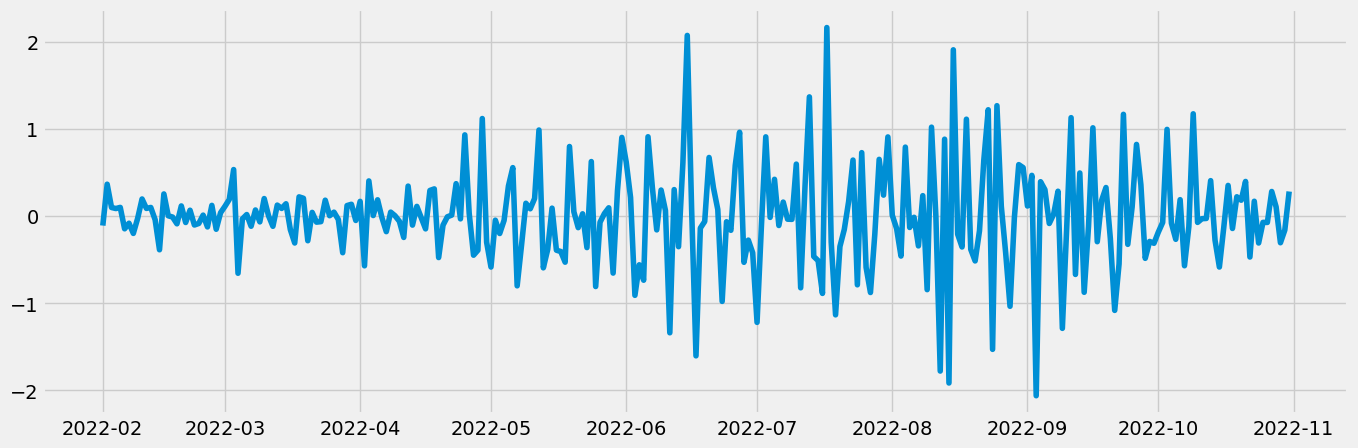

In [41]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [42]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                -1.178286e+01
p-value                        1.025011e-21
Number of Lags Used            5.000000e+00
Number of Observations Used    2.670000e+02
Critical Value (1%)           -3.455081e+00
Critical Value (5%)           -2.872427e+00
Critical Value (10%)          -2.572571e+00
dtype: float64


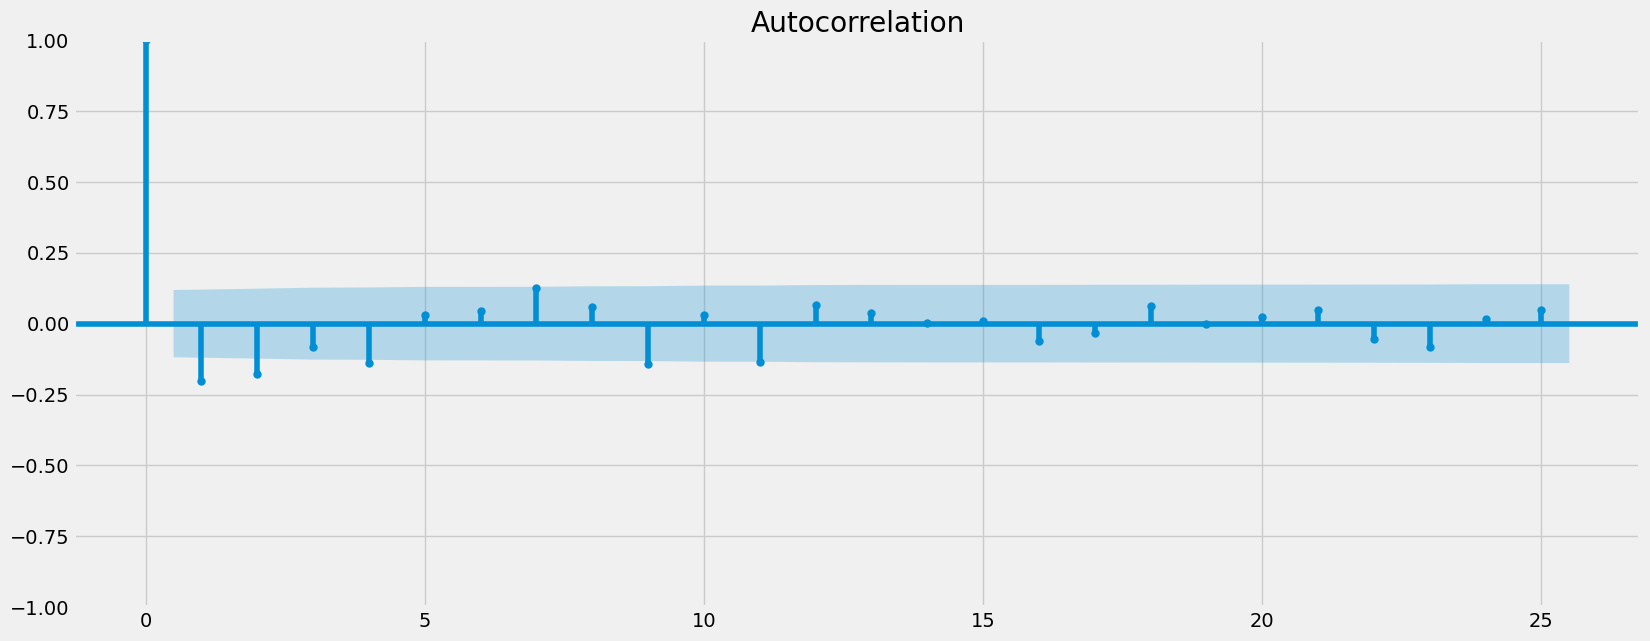

In [43]:
plot_acf(data_diff_2)
plt.show()